<h3>Домашнее заданание №6</h3>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

/home/kach/projects/gb-ds/gb_ds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<h5>1. Решите линейную систему:</h5>

In [4]:
A = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]])
B = np.array([12, 2, 1])
A_det = np.linalg.det(A)
print(A_det,'Определитель не равен нулю: ', A_det != 0)

59.999999999999986 Определитель не равен нулю:  True


In [6]:
res = np.linalg.solve(A, B)
res

array([-9.2       ,  0.9       ,  6.46666667])

In [16]:
np.dot(A, res)

array([12.,  2.,  1.])

<h5>12. Найдите псевдорешение:</h5>
x + 2y – z = 1 <br>
3x – 4y = 7<br>
8x – 5y + 2z = 12 <br>
2x – 5z = 7 <br>
11x +4y – 7z = 15 <br>

In [21]:
A = np.array([[1,  2, -1],
              [3, -4, 0],
              [8, -5, 2],
              [2,  0, -5],
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
res, discr, rank, temp = np.linalg.lstsq(A, B, rcond=None)
print(f'Псевдорешение = {res}')
print(f'Невзязка = {discr}')
print(f'Ранк = {rank}')

Псевдорешение = [ 1.13919353 -0.90498444 -0.9009803 ]
Невзязка = [0.71523211]
Ранк = 3


<h5>3. Сколько решений имеет линейная система:</h5>

In [31]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[12, 2, 1]])

In [27]:
print(f'Определитель А = {np.linalg.det(A)}, Ранг А = {np.linalg.matrix_rank(A)}')

Определитель А = 0.0, Ранг А = 2


In [34]:
C = np.concatenate((A, B.T), axis=1)
print(f'Ранг C = {np.linalg.matrix_rank(C)}')

Ранг C = 3


<p> Ранг матрицы А не равен рангу расширенной матрицы => систма уравнений несовместна и не имеет решений<p>

In [35]:
B0 = np.array([[1, 1, 1]])
C0 = np.concatenate((A, B0.T), axis=1)
print(f'Ранг C = {np.linalg.matrix_rank(C0)}')

Ранг C = 2


<h5>4. Вычислите LU-разложение матрицы:</h5>

In [37]:
A = np.array([[1, 2, 3],
              [2, 16, 21],
              [4, 28, 73]])
np.linalg.det(A)

432.00000000000017

In [39]:
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [42]:
B = np.array([1, 2, 3])
np.linalg.solve(A, B)

array([ 1.01388889,  0.03472222, -0.02777778])

<h5>5. Найдите нормальное псевдорешение недоопределенной системы:</h5>
x + 2y – z = 1 <br>
8x – 5y + 2z = 12 <br>

In [48]:
A = np.array([[1,  2, -1],
              [8, -5,  2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

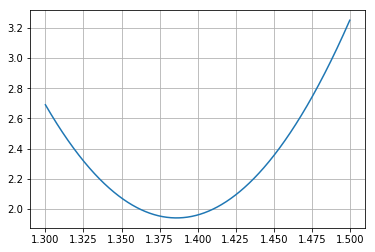

In [53]:
def Q(x, y):
    return (x**2 + y**2)

x = np.linspace(1.3, 1.5, 1000)
plt.plot(x, Q(x, 10*x - 14))
plt.grid(True)
plt.show()

<h5>Найдите одно из псевдорешений вырожденной системы:</h5>

In [55]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([2, 5, 11])

In [58]:
Q, R = np.linalg.qr(A)
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


In [59]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [62]:
B1 = np.dot(Q.T, B)[:2]
B1

array([-1.21860576e+01,  3.55271368e-15])

In [65]:
X = np.append(np.linalg.solve(R1, B1), 0)
X

array([1.50000000e+00, 3.92767275e-15, 0.00000000e+00])

In [66]:
np.linalg.norm(X)

1.499999999999996